In [ ]:
!pip install opencv-python
!pip install pytesseract
!pip install imutils

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def check_image_quality(image):
    # 1. Cek resolusi gambar
    height, width, _ = image.shape
    min_resolution = (800, 600)  # Atur sesuai dengan kebutuhan
    if height < min_resolution[1] or width < min_resolution[0]:
        return {
            'status': False,
            'error': "Resolusi gambar terlalu kecil. Harap gunakan gambar dengan resolusi minimal {}x{}.".format(min_resolution[0], min_resolution[1])
        }

    # 2. Cek tingkat keburaman gambar
    blur_threshold = 100  # Atur sesuai dengan kebutuhan
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur_score = cv2.Laplacian(gray_image, cv2.CV_64F).var()
    if blur_score < blur_threshold:
        return {
            'status': False,
            'error': "Gambar terlalu buram. Harap gunakan gambar yang lebih jelas."
        }

    return {
            'status': True,
            'error': None
        }

In [ ]:
def detect_and_outline(image):
    # Implementasi deteksi dan penjajaran
    # Misalnya, menggunakan algoritma deteksi wajah Haar cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    # Gambar kotak persegi panjang di sekitar setiap wajah
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Kembalikan gambar hasil deteksi dan objek yang telah di-outline
    return image, faces

# Contoh penggunaan
# image = cv2.imread('ktp.jpg')
# detected_image, outlined_objects = detect_and_outline(image)

# # Tampilkan gambar Grayscale
# plt.imshow(detected_image, cmap='gray')
# plt.axis('off')
# plt.show()

# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
def remove_faces(image, faces):
    # Buat salinan gambar asli
    removed_faces_image = image.copy()

    # Ganti area wajah dengan warna hitam
    for (x, y, w, h) in faces:
        removed_faces_image[y:y+h, x:x+w] = (0, 0, 0)  # (0, 0, 0) merupakan warna hitam dalam ruang warna BGR

    return removed_faces_image

# Contoh penggunaan
# image = cv2.imread('ktp.jpg')
# detected_image, faces = detect_and_outline(image)
# removed_faces_image = remove_faces(detected_image, faces)

# # Tampilkan gambar hasil penghilangan wajah
# plt.imshow(removed_faces_image)
# plt.axis('off')
# plt.show()

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [20]:
image = cv2.imread('KTPT.jpg')
check_image = check_image_quality(image)

if check_image['status'] == False:
  print(check_image['error'])

Resolusi gambar terlalu kecil. Harap gunakan gambar dengan resolusi minimal 800x600.


In [ ]:
detected, outlined = detect_and_outline(image)

In [ ]:
remove_faces = remove_faces(detected, outlined)

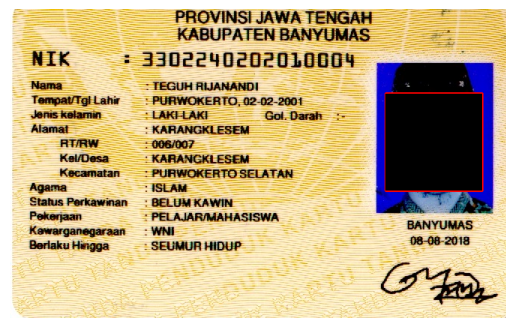

In [ ]:
# Tampilkan gambar hasil penghilangan wajah
plt.imshow(remove_faces)
plt.axis('off')
plt.show()